### Name Entity From Capital Letter Words

In [24]:
#!pip install kneed

In [1]:
import pandas as pd
import numpy as np
import re
from kneed import KneeLocator

In [2]:
df = pd.read_csv("/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/French/Result/Word/Data/Not_Apply_Lower_Word1.csv")
df

,word,frequency
0,de,3981257
1,pas,2693790
2,Je,2606215
3,le,2262594
4,la,2187456
...,...,...
597028,commelundesplusieursvictimes,1
597029,Morceauxassezpourfairequatre,1
597030,WilliamEastonaété,1
597031,quivousdétruire,1


In [3]:
def word_length(var):
    var = str(var)
    if len(var) <= 12:
        return var
    else:
        return "word is bigger than adjust value"

In [4]:
df = pd.DataFrame(df.iloc[:,0].apply(lambda x: word_length(x)))

In [5]:
df.drop(df[df.iloc[:,0] == "word is bigger than adjust value"].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,word
0,de
1,pas
2,Je
3,le
4,la
...,...
544911,lesvictimes
544912,membresdela
544913,ceIlelà
544914,MSabian


In [6]:
capital_word_list = []
lower_word_list = []
for i in df.iloc[:,0]:
    i = str(i)
    if i[0].isupper():
        capital_word_list.append(i)
    else:
        lower_word_list.append(i)

In [7]:
df_capital = pd.DataFrame(capital_word_list)
df_capital.rename(columns={0:"word"}, inplace=True)
df_capital = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_capital

,word
0,Je
1,Cest
2,Tu
3,Il
4,Vous
...,...
259189,Jee
259190,Lecorpsdu
259191,Feiicia
259192,Msabian


In [8]:
df_capital_to_lower = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x : x.lower()))
df_capital_to_lower

,word
0,je
1,cest
2,tu
3,il
4,vous
...,...
259189,jee
259190,lecorpsdu
259191,feiicia
259192,msabian


In [9]:
df_lower = pd.DataFrame(lower_word_list)
df_lower.rename(columns={0:"word"}, inplace=True)
df_lower

,word
0,de
1,pas
2,le
3,la
4,que
...,...
285717,foisdeplus
285718,leFBIet
285719,lesvictimes
285720,membresdela


In [10]:
df_lower_to_lower = pd.DataFrame(df_lower.iloc[:,0].apply(lambda x : x.lower()))
df_lower_to_lower

,word
0,de
1,pas
2,le
3,la
4,que
...,...
285717,foisdeplus
285718,lefbiet
285719,lesvictimes
285720,membresdela


In [11]:
capital_set = set(df_capital_to_lower.iloc[:,0])

In [12]:
lower_set = set(df_lower_to_lower.iloc[:,0])

In [13]:
df_all_capital = pd.DataFrame(capital_set.difference(lower_set))
df_all_capital.rename(columns={0:"word"}, inplace=True)
#df_all_capital = pd.DataFrame(df_all_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_all_capital

,word
0,mettezmoien
1,takuy
2,bernan
3,stl
4,catherina
...,...
149256,atmani
149257,suarez
149258,cosnac
149259,associees


In [21]:
# Check result with all capital word
# df_merge = pd.merge(df_capital, df_all_capital, how="inner", on="word")
# df_merge.drop_duplicates(inplace=True)
# df_merge.reset_index(drop=True, inplace=True)
# df_merge

In [ ]:
df_all_capital.to_excel("All_Capital_Word.xlsx", sheet_name="Word", index=False)

In [14]:
df_sent = pd.read_csv("/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/French/Result/Sentence/Merge/Sentence_Merge_Result2.csv")
df_sent

,sentence,frequency
0,oui,756745
1,non,718649
2,quoi,467154
3,merci,406234
4,daccord,264448
...,...,...
8578197,makise a rejoint genji,2
8578198,makise est introuvable,2
8578199,makittaqanngitsoq,2
8578200,makkie,2


In [15]:
first_words = []
for i in df_sent.iloc[:,0]: # Select sentence first word
    words = re.findall("\w+", i)
    first_words.append(words[0])

In [16]:
first_ser = pd.Series(first_words)
first_ser

0                        oui
1                        non
2                       quoi
3                      merci
4                    daccord
                 ...        
8578197               makise
8578198               makise
8578199    makittaqanngitsoq
8578200               makkie
8578201                   la
Length: 8578202, dtype: object

In [17]:
df_first = pd.DataFrame(first_ser.value_counts(ascending=False))
df_first.reset_index(inplace=True)
df_first.rename(columns={"index":"word", 0:"frequency"}, inplace=True)
df_first

,word,frequency
0,je,801735
1,tu,398701
2,il,387000
3,cest,345000
4,on,292174
...,...,...
163847,kayli,1
163848,kaycee,1
163849,kayar,1
163850,mcinerney,1


In [18]:
total_frequency = df_first.iloc[:,1].sum()
total_frequency

8578202

In [19]:
df_first["ratio"] = round(((df_first.iloc[:,1]/total_frequency)*100),7)
df_first

,word,frequency,ratio
0,je,801735,9.346189
1,tu,398701,4.647839
2,il,387000,4.511435
3,cest,345000,4.021822
4,on,292174,3.406005
...,...,...,...
163847,kayli,1,0.000012
163848,kaycee,1,0.000012
163849,kayar,1,0.000012
163850,mcinerney,1,0.000012


In [20]:
df_first["cumul_ratio"] = np.cumsum(df_first.iloc[:,2])
df_first

,word,frequency,ratio,cumul_ratio
0,je,801735,9.346189,9.346189
1,tu,398701,4.647839,13.994028
2,il,387000,4.511435,18.505463
3,cest,345000,4.021822,22.527285
4,on,292174,3.406005,25.933290
...,...,...,...,...
163847,kayli,1,0.000012,100.003479
163848,kaycee,1,0.000012,100.003490
163849,kayar,1,0.000012,100.003502
163850,mcinerney,1,0.000012,100.003514


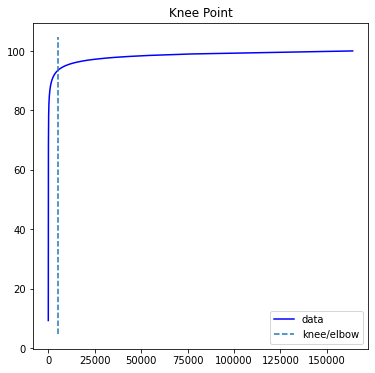

In [21]:
word_kneedle = KneeLocator(x=df_first.cumul_ratio.index, y=df_first.cumul_ratio, S=1.0, curve="concave", direction="increasing")
word_kneedle.plot_knee()

In [22]:
print(round(word_kneedle.knee_y))

94


In [23]:
knee_point_word = round(word_kneedle.knee_y)

In [24]:
df_first_knee = df_first[df_first.cumul_ratio <= knee_point_word]
df_first_knee

,word,frequency,ratio,cumul_ratio
0,je,801735,9.346189,9.346189
1,tu,398701,4.647839,13.994028
2,il,387000,4.511435,18.505463
3,cest,345000,4.021822,22.527285
4,on,292174,3.406005,25.933290
...,...,...,...,...
6213,moon,38,0.000443,93.998226
6214,coupons,38,0.000443,93.998669
6215,léventreur,38,0.000443,93.999112
6216,jambes,38,0.000443,93.999555


In [26]:
df_first_no_knee = df_first[df_first.cumul_ratio > knee_point_word]
df_first_no_knee.reset_index(drop=True, inplace=True)
df_first_no_knee

,word,frequency,ratio,cumul_ratio
0,toimême,38,0.000443,94.000441
1,remarquable,38,0.000443,94.000884
2,clé,38,0.000443,94.001327
3,supprimer,38,0.000443,94.001770
4,lucinda,38,0.000443,94.002213
...,...,...,...,...
157629,kayli,1,0.000012,100.003479
157630,kaycee,1,0.000012,100.003490
157631,kayar,1,0.000012,100.003502
157632,mcinerney,1,0.000012,100.003514


In [27]:
set_first_knee = set(df_first_knee.iloc[:,0])

In [28]:
set_first_no_knee = set(df_first_no_knee.iloc[:,0])

In [29]:
set_all_capital = set(df_all_capital.iloc[:,0])

In [30]:
pd.DataFrame(set_all_capital.difference(set_first_knee))

,0
0,takuy
1,bernan
2,catherina
3,oudini
4,fiedler
...,...
148674,haslett
148675,malchow
148676,ryudai
148677,xan
